In [0]:
True

Out[2]: True

# Latent Semantic Analysis

Before we begin, let's define some basic vocabulary. 

**Natural language processing** refers to a family of techniques used to derive meaning from text data.

A **document** refers to some collection of words and represents the instances or "rows" of our dataset. 

A **body** is a collection of documents and is our entire data set.

A **dictionary** is the set of all words that appear in at least one document in our body.

A **topic** is a collection of words that co-occur.

The word **latent** means hidden. In this context, we are referring to features that are "hidden" in the data. That they are hidden referes to the fact that they can not be directly measured. These latent features are essential to the data, but are not the orginal features of the data set.

**Latent Semantic Analysis (LSA)** is:

- a natural language processing technique
- an unsupervised learning technique
- aims to create representations of the documents in a body based on the topics inherent to that body
- reducing the dimensionality of a text-based dataset
- consists of two steps:
   - creating a document-term matrix
   - dimensionality reduction via a singular value decomposition

## Document-Term Matrix

A basic idea of a Document-Term Matrix is that documents can be represented as points in Euclidean space aka **vectors**.

Here is an example of a document-term matrix.

![](https://www.evernote.com/l/AAE9rZErr9BCcLX-wE6dpPbqNTsxKNmxH3UB/image.png)

Here, each document is a simple statement describing the nature of a canine and defines the rows of our matrix. The dictionary defines the columns of our matrix.

#### Documents as Vectors

According to this Document-Term matrix,

$$\text{"the quick brown fox"} = (1,0,1,0,1,0,0,1,0)$$
$$\text{"the slow brown dog"}  = (1,1,0,0,0,0,1,1,0)$$
$$\text{"the quick red dog"}   = (0,1,0,0,1,1,0,1,0)$$
$$\text{"the lazy yellow fox"} = (0,0,1,1,0,0,0,1,1)$$

## Singular Value Decomposition

The Singular Value Decomposition (SVD) 

- is similar to a Principal Component Analysis
- reduces the dimension of the original data
- transforms the data to be encoded using latent, or hidden, variables
- for LSA, these latent variables represent topics

## Implementation in Scikit-Learn

We will first demonstrate a trivial implementation using the Python library, [Scikit-Learn](https://scikit-learn.org/stable/).

![](https://www.evernote.com/l/AAGiYGcKcIxIaJ7sCg97K9JDtUO2dY9mywoB/image.png)

### Raw Text Data

<img src="https://www.evernote.com/l/AAFfAyDQQ1xGPLTIxT2hcUSLrHuQDbYzsuYB/image.png" width=600px>

Here each line of text is a **document** and the collection of all lines of text is the **body**.

One advantage of working in databricks is that the Databricks Runtime for ML contains many popular machine learning libraries, including Scikit-Learn, TensorFlow, and XGBoost. We will the Databricks Runtime for ML to implement our Latent Semantic Analysis in Scikit-Learn.

In [0]:
body = [
    "the quick brown fox",
    "the slow brown dog",
    "the quick red dog",
    "the lazy yellow fox"
]

### Document-Term Matrix

<img src="https://www.evernote.com/l/AAFtjaKOjT5CYr5N_NPHKU6vpBWNnBgbWLIB/image.png" width=600px>

The Document-Term Matrix can be created using the `CountVectorizer` model [[doc]](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) in Scikit-Learn.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(body)

This process has converted each **document** into a vector. The matrix consists of a vector for each "document" in the **body**.

$$\text{"the quick brown fox"} = (1,0,1,0,1,0,0,1,0)$$
$$\text{"the slow brown dog"}  = (1,1,0,0,0,0,1,1,0)$$
$$\text{"the quick red dog"}   = (0,1,0,0,1,1,0,1,0)$$
$$\text{"the lazy yellow fox"} = (0,0,1,1,0,0,0,1,1)$$

In [0]:
bag_of_words.todense()

Out[5]: matrix([[1, 0, 1, 0, 1, 0, 0, 1, 0],
 [1, 1, 0, 0, 0, 0, 1, 1, 0],
 [0, 1, 0, 0, 1, 1, 0, 1, 0],
 [0, 0, 1, 1, 0, 0, 0, 1, 1]])

### Singular Value Decomposition

<img src="https://www.evernote.com/l/AAEhTiOBufhPwKBx-Hgufx4XZ5XyfsCp8cMB/image.png" width=600px>

This can be achieved using the `TruncatedSVD` model. 

The function is named "truncated" SVD because it is capable of returning a dataset with fewer features than it is passed without significant loss of information, that is, it is great for reducing the dimension of data.

In [0]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
lsa = svd.fit_transform(bag_of_words)

### Topic Encoded Data

<img src="https://www.evernote.com/l/AAGhSgfs1nZHAIYfbnmNaHU8YjMV2i9fTmgB/image.png" width=600px>

The process transforms the original data into **topic-encoded data**.

Here, each row is indexed by its original text value. The data now consists of two columns of data one representing each of the two topics used to encode the **body**. Recall that this value of 2 was passed as an argument to the `TruncatedSVD` in the previous step.

In [0]:
import pandas as pd

topic_encoded_df = pd.DataFrame(lsa, columns = ["topic_1", "topic_2"])
topic_encoded_df["body"] = body
display(topic_encoded_df[["body", "topic_1", "topic_2"]])

body,topic_1,topic_2
the quick brown fox,1.694904931186464,0.2995240544049733
the slow brown dog,1.5158511142026008,-0.769110367236389
the quick red dog,1.5158511142026003,-0.7691103672363859
the lazy yellow fox,1.2661860628667394,1.4405851327176702


## Byproducts of the Latent Semantic Analysis

The LSA generates a few byproducts that are useful for analysis:

- the **dictionary** or the set of all words that appear at least once in the **body**
- the **encoding matrix** used to encode the documents into topics. The **encoding matrix** can be studied to gain an understanding of the **topics** that are latent to the **body**.

#### The Dictionary

The dictionary is an attribute of a fit `CountVectorizer` model and can be accessed using the `.get_feature_names` method.

In [0]:
dictionary = vectorizer.get_feature_names()
dictionary

Out[8]: ['brown', 'dog', 'fox', 'lazy', 'quick', 'red', 'slow', 'the', 'yellow']

#### The Encoding Matrix

The **encoding matrix** is comprised of the `components_` stored as an attribute of a fit `TruncatedSVD`. We can examine this matrix to gain an understanding of the **topics** latent to the **body**.

**Note:** in `sklearn`, attributes of a model that are generated by a fitting process have a trailing underscore in their name as can be seen here with `svd.components_`.

In [0]:
encoding_matrix = pd.DataFrame(svd.components_,
                               index=['topic_1', 'topic_2'],
                               columns=dictionary).T
encoding_matrix

Out[9]:

,topic_1,topic_2
brown,0.353937,-0.140256
dog,0.334199,-0.459436
fox,0.326416,0.519736
lazy,0.139578,0.430274
quick,0.353937,-0.140256
red,0.167100,-0.229718
slow,0.167100,-0.229718
the,0.660615,0.060300
yellow,0.139578,0.430274


#### Interpret The Encoding Matrix

What are the top words for each topic? What dimensions in word-space explain most of the variance in the data? 

To analyze this, we will need to look at the *absolute value* of the expression of each word in the topic.

In [0]:
import numpy as np

encoding_matrix['abs_topic_1'] = np.abs(encoding_matrix['topic_1'])
encoding_matrix['abs_topic_2'] = np.abs(encoding_matrix['topic_2'])
encoding_matrix.sort_values('abs_topic_1', ascending=False)

Out[10]:

,topic_1,topic_2,abs_topic_1,abs_topic_2
the,0.660615,0.060300,0.660615,0.060300
brown,0.353937,-0.140256,0.353937,0.140256
quick,0.353937,-0.140256,0.353937,0.140256
dog,0.334199,-0.459436,0.334199,0.459436
fox,0.326416,0.519736,0.326416,0.519736
slow,0.167100,-0.229718,0.167100,0.229718
red,0.167100,-0.229718,0.167100,0.229718
lazy,0.139578,0.430274,0.139578,0.430274
yellow,0.139578,0.430274,0.139578,0.430274


In [0]:
encoding_matrix.sort_values('abs_topic_2', ascending=False)

Out[11]:

,topic_1,topic_2,abs_topic_1,abs_topic_2
fox,0.326416,0.519736,0.326416,0.519736
dog,0.334199,-0.459436,0.334199,0.459436
lazy,0.139578,0.430274,0.139578,0.430274
yellow,0.139578,0.430274,0.139578,0.430274
slow,0.167100,-0.229718,0.167100,0.229718
red,0.167100,-0.229718,0.167100,0.229718
brown,0.353937,-0.140256,0.353937,0.140256
quick,0.353937,-0.140256,0.353937,0.140256
the,0.660615,0.060300,0.660615,0.060300


## Latent Semantic Analysis of Two Poems

**Latent Semantic Analysis (LSA)** is:

- a natural language processing technique
- an unsupervised learning technique
- aims to create representations of the documents in a body based on the topics inherent to that body
- reducing the dimensionality of a text-based dataset
- consists of two steps:
   - creating a document-term matrix
   - dimensionality reduction via a singular value decomposition

![](https://www.evernote.com/l/AAGiYGcKcIxIaJ7sCg97K9JDtUO2dY9mywoB/image.png)

### Raw Text Data

<img src="https://www.evernote.com/l/AAFfAyDQQ1xGPLTIxT2hcUSLrHuQDbYzsuYB/image.png" width=600px>

Here each line of text from a book is a **document** and the collection of all lines of text from the two books is the **body**.

In [0]:
import urllib
import sys

if sys.version[0] == "3":
  retrieve = urllib.request.urlretrieve
else:
  rerieve = urllib.urlretrieve
 
url = "https://files.training.databricks.com/classes/lsa-videos/body.csv"
from pyspark import SparkFiles
spark.sparkContext.addFile(url)

df = spark.read.csv("file://"+SparkFiles.get("body.csv"), header=True, inferSchema= True)
#df = spark.read.csv("https://files.training.databricks.com/classes/lsa-videos/body.csv")

#bodyDF = (spark.read
#  .option("header", "true")
#  .csv("/tmp/body.csv"))
#display(bodyDF)


In [0]:
body_df = df.toPandas()
sample_df = body_df.sample(5)
sample_indices = sample_df.index
display(sample_df)

sentence,title
Honour the charge they made!,Charge of the Light Brigade
"Honour the Light Brigade,",Charge of the Light Brigade
"By the grave and stern decorum of the countenance it wore,",The Raven
When can their glory fade?,Charge of the Light Brigade
"“Prophet!” said I, “thing of evil!—prophet still, if bird or devil!",The Raven


### Document-Term Matrix

<img src="https://www.evernote.com/l/AAFtjaKOjT5CYr5N_NPHKU6vpBWNnBgbWLIB/image.png" width=600px>

Again, we use `CountVectorizer`, now with a few more arguments:

- `min_df` signifies the number of documents in which a term must appear in order for it to be counted
- You can view the `english` `stop_words` here: https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/feature_extraction/stop_words.py

Note that `CountVectorizer` returns a [sparse](https://en.wikipedia.org/wiki/Sparse_matrix) matrix [[doc](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.transform)].

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=1, stop_words='english')
bag_of_words = vectorizer.fit_transform(body_df.sentence)

### Singular Value Decomposition

<img src="https://www.evernote.com/l/AAEhTiOBufhPwKBx-Hgufx4XZ5XyfsCp8cMB/image.png" width=600px>

In [0]:
svd = TruncatedSVD(n_components=2)
lsa = svd.fit_transform(bag_of_words)

### Topic Encoded Data

<img src="https://www.evernote.com/l/AAGhSgfs1nZHAIYfbnmNaHU8YjMV2i9fTmgB/image.png" width=600px>

In [0]:
topic_encoded_df = pd.DataFrame(lsa, columns = ["topic_1", "topic_2"])
topic_encoded_df['sentence'] = body_df.sentence
topic_encoded_df['Is_Poe'] = (body_df.title == "The Raven")
display(topic_encoded_df.iloc[sample_indices])

topic_1,topic_2,sentence,Is_Poe
0.0019873760472197102,0.02239937159865354,Honour the charge they made!,false
1.1148980454253968E-4,0.002085501099455816,"Honour the Light Brigade,",false
-4.4339491221707594E-5,-1.33200653573137E-4,"By the grave and stern decorum of the countenance it wore,",true
-2.0640540471791766E-7,-5.1850322266446086E-8,When can their glory fade?,false
0.5155439292432566,2.243363725122993,"“Prophet!” said I, “thing of evil!—prophet still, if bird or devil!",true


#### The Dictionary

In [0]:
dictionary = vectorizer.get_feature_names()
dictionary[:10]

Out[24]: ['adore',
 'agreeing',
 'ah',
 'aidenn',
 'air',
 'ancient',
 'angels',
 'answer',
 'aptly',
 'army']

#### The Encoding Matrix

In [0]:
encoding_matrix = pd.DataFrame(svd.components_,
                               index=['topic_1', 'topic_2']).T
encoding_matrix["terms"] = dictionary
display(encoding_matrix)

topic_1,topic_2,terms
2.0553749562720342E-4,9.948212421753834E-4,adore
-7.704364036847209E-6,9.792882304772029E-6,agreeing
9.202087874034631E-4,0.017330690735747268,ah
0.0011352845665103873,0.003110904885064998,aidenn
-1.355675815221503E-4,5.39937639974134E-4,air
0.0021182343396553612,0.02222239873589158,ancient
0.00857275847504928,0.04640284214503499,angels
-1.0979427001262058E-4,-8.102322306202311E-4,answer
5.229101853985408E-4,9.845117660211486E-4,aptly
2.2192811397135196E-7,-4.3670809677673067E-7,army


#### Interpret The Encoding Matrix

What are the top "concepts"? What dimensions in term-space explain most of the variance in the data?

In [0]:
encoding_matrix['abs_topic_1'] = np.abs(encoding_matrix['topic_1'])
encoding_matrix['abs_topic_2'] = np.abs(encoding_matrix['topic_2'])
display(encoding_matrix.sort_values('abs_topic_1', ascending=False))

topic_1,topic_2,terms,abs_topic_1,abs_topic_2
0.6324630487998818,-0.13352938779560483,door,0.6324630487998818,0.13352938779560483
0.5250892067897677,-0.14428279917010328,chamber,0.5250892067897677,0.14428279917010328
0.24854731902080754,0.0010100244014053731,bust,0.24854731902080754,0.0010100244014053731
0.22775355840635678,0.4402784384724538,bird,0.22775355840635678,0.4402784384724538
0.17107047995201763,-0.08060516138171261,tapping,0.17107047995201763,0.08060516138171261
0.15379202583024099,-0.06384284788617665,visitor,0.15379202583024099,0.06384284788617665
0.10879775738294178,-0.033750495010337556,just,0.10879775738294178,0.033750495010337556
0.10879775738294178,-0.033750495010337556,pallas,0.10879775738294178,0.033750495010337556
0.10748118784528016,-0.04592198525720489,tis,0.10748118784528016,0.04592198525720489
0.10309661056127038,-0.035448036055865155,perched,0.10309661056127038,0.035448036055865155


In [0]:
display(encoding_matrix.sort_values('abs_topic_2', ascending=False))

topic_1,topic_2,terms,abs_topic_1,abs_topic_2
0.22775355840635678,0.4402784384724538,bird,0.22775355840635678,0.4402784384724538
0.06592893338920483,0.4089010654422164,prophet,0.06592893338920483,0.4089010654422164
0.05703910397468302,0.37193155760278346,said,0.05703910397468302,0.37193155760278346
0.023637965296551763,0.2841427095656751,nevermore,0.023637965296551763,0.2841427095656751
0.02925129219623993,0.26425483602398525,raven,0.02925129219623993,0.26425483602398525
0.032964466694602415,0.2044505327211082,devil,0.032964466694602415,0.2044505327211082
0.032964466694602415,0.2044505327211082,evil,0.032964466694602415,0.2044505327211082
0.032964466694602415,0.2044505327211082,thing,0.032964466694602415,0.2044505327211082
0.009906021670772057,0.16194746964183002,quoth,0.009906021670772057,0.16194746964183002
0.036213695428928744,0.1558339189676011,fancy,0.036213695428928744,0.1558339189676011


### Plot Topic Encoded Data

False
True

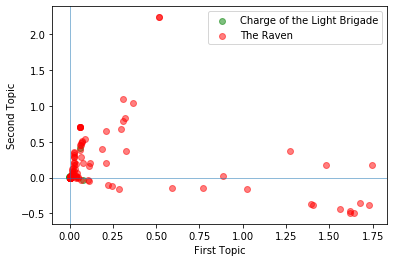

In [0]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for val in topic_encoded_df.Is_Poe.unique():
  topic_1 = topic_encoded_df[topic_encoded_df.Is_Poe == val]['topic_1'].values
  topic_2 = topic_encoded_df[topic_encoded_df.Is_Poe == val]['topic_2'].values
  print(val)
  color = "red" if val else "green"
  label = "The Raven" if val else "Charge of the Light Brigade"
  ax.scatter(topic_1, topic_2, c=color, alpha=0.5, label=label)
# made the colors represent different books

ax.set_xlabel('First Topic')
ax.set_ylabel('Second Topic')
ax.axvline(linewidth=0.5)
ax.axhline(linewidth=0.5)
ax.legend()

display(fig)

## Revising the LSA with a TF-IDF Document-Term Matrix

**Latent Semantic Analysis (LSA)** is:

- a natural language processing technique
- an unsupervised learning technique
- aims to create representations of the documents in a body based on the topics inherent to that body
- reducing the dimensionality of a text-based dataset
- consists of two steps:
   - creating a document-term matrix
   - dimensionality reduction via a singular value decomposition

![](https://www.evernote.com/l/AAGiYGcKcIxIaJ7sCg97K9JDtUO2dY9mywoB/image.png)

### The SVD is deterministic

Finding the vectors generated by an SVD is analogous to finding the eigenvectors of the covariance matrix of the data. Without going to deeply into the meaning of this suffice it to say that these vectors are deterministic and will not change with subsequent fiitting of the model. 

In other words, as data scientists we have very little control of the output of an SVD. We can choose a number of output vectors, but the number of vectors returned has no bearing on the output. We can not tune the model in the conventional sense by, that is, by adjusting hyperparameters. The only hyperparameter to be tuned has no impact on any one individual vector returned.

### Tuning a Latent Semantic Analysis

The word "eigen" is German for "own" or "inherent". Each eigenvector returned is in some way "of" or "inherent to" the underlying Document-Term Matrix. The LSA is based upon these eigenvectors, but the SVD being deterministic, there is no way to directly alter them.

What can be done is to alter the Document-Term Matrix itself. One popular method for doing this is to use the term frequency-inverse document frequency algorithm in the preparation of the Document-Term Matrix rather than a simple count.

#### Term Frequency-Inverse Document Frequency

A simple count collects term frequency, the number of times a term appears in a document. A TFIDF weighs this term frequency by the inverse of the document frequency, that is, the number of documents in which the term appears.

Without going into the details of how a [TFIDF](https://spark.apache.org/docs/latest/mllib-feature-extraction.html) is calculated we can note conceptually that will help to reflect the importance of a term to a document in the body. If we only use term frequency to measure the importance, it is very easy to over-emphasize terms that appear very often but carry little information about the document, e.g. “a”, “the”, and “of”. If a term appears very often across the body, it means it doesn’t carry special information about a particular document. Inverse document frequency is a numerical measure of how much information a term provides.

Here, we will look at using TFIDF to generate the Document-Term Matrix and how it effects the LSA.

### Raw Text Data

<img src="https://www.evernote.com/l/AAFfAyDQQ1xGPLTIxT2hcUSLrHuQDbYzsuYB/image.png" width=600px>

Here each line of text from a book is a **document** and the collection of all lines of text from the two books is the **body**.

### Document-Term Matrix

<img src="https://www.evernote.com/l/AAFtjaKOjT5CYr5N_NPHKU6vpBWNnBgbWLIB/image.png" width=600px>

Again, we use `CountVectorizer`, now with a few more arguments:

- `min_df` signifies the number of documents in which a term must appear in order for it to be counted
- You can view the `english` `stop_words` here: https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/feature_extraction/stop_words.py

Note that `CountVectorizer` returns a [sparse](https://en.wikipedia.org/wiki/Sparse_matrix) matrix [[doc](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.transform)].

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=1, stop_words='english')
bag_of_words = vectorizer.fit_transform(body_df.sentence)

### Singular Value Decomposition

<img src="https://www.evernote.com/l/AAEhTiOBufhPwKBx-Hgufx4XZ5XyfsCp8cMB/image.png" width=600px>

In [0]:
svd = TruncatedSVD(n_components=2)
lsa = svd.fit_transform(bag_of_words)

### Topic Encoded Data

<img src="https://www.evernote.com/l/AAGhSgfs1nZHAIYfbnmNaHU8YjMV2i9fTmgB/image.png" width=600px>

In [0]:
topic_encoded_tfidf_df = pd.DataFrame(lsa, columns = ["topic_1", "topic_2"])
topic_encoded_tfidf_df['sentence'] = body_df.sentence
topic_encoded_tfidf_df['Is_Poe'] = (body_df.title == "The Raven")
display(topic_encoded_tfidf_df.iloc[sample_indices])

topic_1,topic_2,sentence,Is_Poe
0.0016500235269532662,2.288338050930582E-5,Honour the charge they made!,false
-1.7548973692005623E-4,6.277426163376662E-5,"Honour the Light Brigade,",false
-1.7553826582796766E-5,8.956445006612219E-5,"By the grave and stern decorum of the countenance it wore,",true
-2.410582092078823E-6,4.661760797200952E-5,When can their glory fade?,false
0.040137110018803865,-3.4322525630005985E-4,"“Prophet!” said I, “thing of evil!—prophet still, if bird or devil!",true


#### The Dictionary

In [0]:
dictionary = vectorizer.get_feature_names()
dictionary[:10]

Out[32]: ['adore',
 'agreeing',
 'ah',
 'aidenn',
 'air',
 'ancient',
 'angels',
 'answer',
 'aptly',
 'army']

#### The Encoding Matrix

In [0]:
encoding_matrix = pd.DataFrame(svd.components_,
                               index=['topic_1', 'topic_2']).T
encoding_matrix["terms"] = dictionary
display(encoding_matrix)

topic_1,topic_2,terms
-1.8700022761597168E-6,-5.746332270769932E-5,adore
1.663664774563253E-5,1.821125764408288E-5,agreeing
0.029703163595169516,-4.551900788512908E-4,ah
4.270663855840754E-5,-5.945441100497917E-5,aidenn
2.2333088557987838E-5,-1.0127260471017498E-4,air
0.009614335452364401,2.521415640920875E-4,ancient
0.0023276629173330436,-4.6867743349383515E-4,angels
-7.208566486656685E-6,-1.6800806487630237E-5,answer
2.958454651229147E-5,9.573200479268778E-5,aptly
1.8319827532349946E-5,3.3740365599800616E-5,army


#### Interpret The Encoding Matrix

What are the top "concepts"? What dimensions in term-space explain most of the variance in the data?

In [0]:
encoding_matrix['abs_topic_1'] = np.abs(encoding_matrix['topic_1'])
encoding_matrix['abs_topic_2'] = np.abs(encoding_matrix['topic_2'])
display(encoding_matrix.sort_values('abs_topic_1', ascending=False))

topic_1,topic_2,terms,abs_topic_1,abs_topic_2
0.742440728921033,-0.002160406264562631,nevermore,0.742440728921033,0.002160406264562631
0.4730101634217367,0.001244740131650978,quoth,0.4730101634217367,0.001244740131650978
0.4508091562177714,0.002390361628252829,raven,0.4508091562177714,0.002390361628252829
0.06564386156094934,-0.0010894397816489211,shall,0.06564386156094934,0.0010894397816489211
0.05662024190502337,2.978028249783735E-4,bird,0.05662024190502337,2.978028249783735E-4
0.053822680309263425,-7.584531895930492E-4,said,0.053822680309263425,7.584531895930492E-4
0.041961637765888744,-5.805022792845653E-4,lifted,0.041961637765888744,5.805022792845653E-4
0.036144909128530064,-3.9967932119925367E-4,croaking,0.036144909128530064,3.9967932119925367E-4
0.036144909128530064,-3.9967932119925367E-4,meant,0.036144909128530064,3.9967932119925367E-4
0.03420144813183127,9.706929319602378E-4,sitting,0.03420144813183127,9.706929319602378E-4


In [0]:
display(encoding_matrix.sort_values('abs_topic_2', ascending=False))

topic_1,topic_2,terms,abs_topic_1,abs_topic_2
-6.883335945300677E-5,0.9949219350744436,rode,6.883335945300677E-5,0.9949219350744436
-6.299106557477453E-6,0.10032767518874024,boldly,6.299106557477453E-6,0.10032767518874024
-0.0010902241620224307,-0.0032574535882201176,volleyed,0.0010902241620224307,0.0032574535882201176
-0.0010902241620224307,-0.0032574535882201176,thundered,0.0010902241620224307,0.0032574535882201176
0.4508091562177714,0.002390361628252829,raven,0.4508091562177714,0.002390361628252829
-6.403270651560916E-4,-0.0022724734021843866,left,6.403270651560916E-4,0.0022724734021843866
0.742440728921033,-0.002160406264562631,nevermore,0.742440728921033,0.002160406264562631
0.02399633548777242,0.0014647431928544706,fancy,0.02399633548777242,0.0014647431928544706
3.2041372813553404E-4,0.0014038312996478386,cannon,3.2041372813553404E-4,0.0014038312996478386
0.4730101634217367,0.001244740131650978,quoth,0.4730101634217367,0.001244740131650978


### Plot Top Two Components

False
True

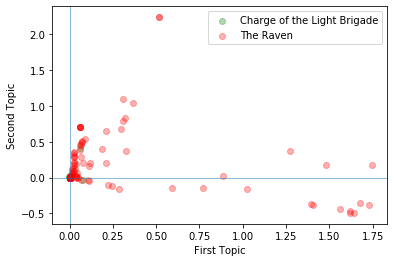

In [0]:
fig, ax = plt.subplots()

for val in topic_encoded_df.Is_Poe.unique():
  topic_1 = topic_encoded_df[topic_encoded_df.Is_Poe == val]['topic_1'].values
  topic_2 = topic_encoded_df[topic_encoded_df.Is_Poe == val]['topic_2'].values
  print(val)
  color = "red" if val else "green"
  label = "The Raven" if val else "Charge of the Light Brigade"
  ax.scatter(topic_1, topic_2, c=color, alpha=0.3, label=label)
# made the colors represent different books

ax.set_xlabel('First Topic')
ax.set_ylabel('Second Topic')
ax.axvline(linewidth=0.5)
ax.axhline(linewidth=0.5)
ax.legend()

display(fig)

False
True

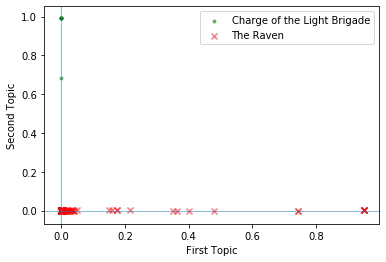

In [0]:
fig, ax = plt.subplots()

for val in topic_encoded_tfidf_df.Is_Poe.unique():
  topic_1 = topic_encoded_tfidf_df[topic_encoded_tfidf_df.Is_Poe == val]['topic_1'].values
  topic_2 = topic_encoded_tfidf_df[topic_encoded_tfidf_df.Is_Poe == val]['topic_2'].values
  print(val)
  color = "red" if val else "green"
  marker = "x" if val else "."
  label = "The Raven" if val else "Charge of the Light Brigade"
  ax.scatter(topic_1, topic_2, marker=marker, c=color, alpha=0.5, label=label)
# made the colors represent different books

ax.set_xlabel('First Topic')
ax.set_ylabel('Second Topic')
ax.axvline(linewidth=0.5)
ax.axhline(linewidth=0.5)
ax.legend()

display(fig)